In [1]:
import numpy
# import torch
import tensorflow as tf
# import torch.optim as optim
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [ ]:
y_path = '/../y_10310.pkl'
X_path = '/../X_10310.pkl'

with open(y_path, 'rb') as f:
    y = pickle.load(f)
with open(X_path, 'rb') as f:
    X = pickle.load(f)

In [3]:
number_of_classes = 26

y = tf.keras.utils.to_categorical(y, number_of_classes)
# y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [4]:
X1, X2, y1,   y2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
np.unique(y1), np.unique(y2)

(array([0., 1.]), array([0., 1.]))

In [6]:
X1.shape, X2.shape

((214458, 28, 28), (53615, 28, 28))

In [7]:
train_images = X1
test_images = X2

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [8]:
train_x,val_x,train_y,val_y = train_test_split(train_images,y1,test_size=0.125,random_state = 42)

In [9]:
np.unique(np.argmax(train_y, axis = 1)), np.unique(np.argmax(val_y, axis = 1))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]))

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


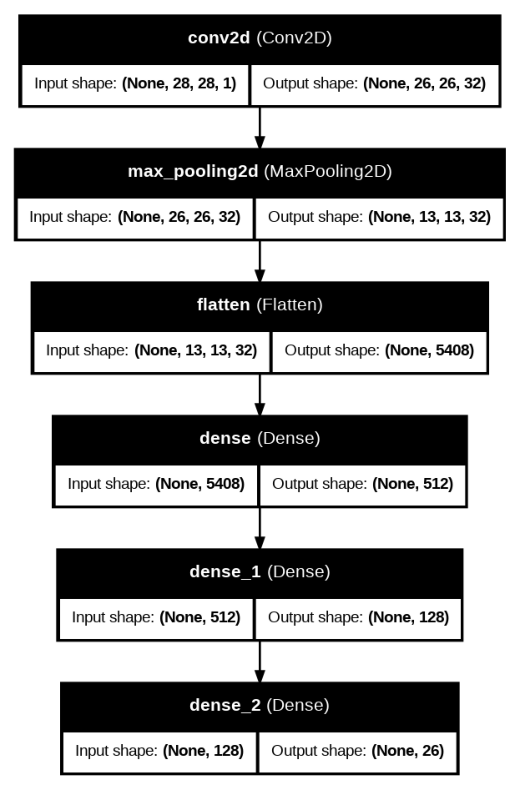

In [12]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
plot_model(
    model,
    to_file='cnn_model_architecture.png',
    show_shapes=True,  # Display tensor shapes
    show_layer_names=True,  # Display layer names
    expand_nested=True,  # Expand nested models if present
    dpi=96  # Resolution
)

# Display the saved image
image = Image.open('cnn_model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
MCP = ModelCheckpoint('Best_points.keras',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [15]:
train_y.shape, val_y.shape

((187650, 26), (26808, 26))

In [16]:
history = model.fit(train_x,train_y,epochs=100,validation_data=(val_x,val_y),callbacks=[MCP,ES,RLP])

Epoch 1/100
5865/5865 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8628 - loss: 0.5300
Epoch 1: val_accuracy improved from -inf to 0.92894, saving model to Best_points.keras
5865/5865 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8628 - loss: 0.5299 - val_accuracy: 0.9289 - val_loss: 0.3477 - learning_rate: 0.0010
Epoch 2/100
5856/5865 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9400 - loss: 0.2658
Epoch 2: val_accuracy did not improve from 0.92894
5865/5865 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9400 - loss: 0.2658 - val_accuracy: 0.9273 - val_loss: 0.3704 - learning_rate: 0.0010
Epoch 3/100
5864/5865 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9414 - loss: 0.2706
Epoch 3: val_accuracy improved from 0.92894 to 0.93457, saving model to Best_points.keras
5865/5865 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9414 - loss: 0.2706 - val_accuracy: 0.9346 - val_loss: 0.3586 - learning_rate: 0.0010
Epoch 4/100
5853/5865 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9432

In [17]:
import seaborn as sns

In [18]:
X.shape

(268073, 28, 28)

Text(0, 0.5, 'Accuracy')

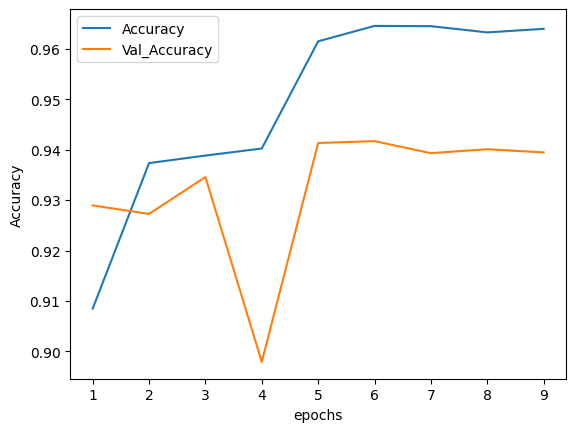

In [19]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [20]:
from keras.models import load_model

# Load the model
model = load_model('Best_points.keras')

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
predictions = model.predict(X2)

# Convert predictions to class labels (assuming a classification problem with softmax output)
predicted_classes = np.argmax(predictions, axis=1)
# Convert true labels to class indices
true_classes = np.max(np.argmax(y2, axis=1), axis = 1)

# Now `true_classes` will have the shape (n_samples,)
print(f"True classes: {true_classes}")
print(f"Predicted classes: {predicted_classes}")

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optional: Detailed classification report
print("\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes))


1676/1676 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
np.argmax(y2[0:5], axis = 1)

In [ ]:
X2[0]

In [ ]:
from PIL import Image

In [ ]:
image = Image.fromarray(X2[-1] * 255, mode='L')

# Display the image
image.show()

In [ ]:
plt.imshow(X2[-1] * 255, cmap='gray')
plt.show()

In [ ]:
from google.colab import files
files.download('/content/cnn.keras')